In [7]:
import pandas as pd # importing libraries
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

In [8]:
# creating two function to be used later to calculate dom_percent, one for three point seasons, the other for two point seasons
def calc_dom_2(points, teams):
    points_offered = 4 * (teams - 1)
    return points / points_offered

def calc_dom_3(points, teams):
    points_offered = 6 * (teams - 1)
    return points / points_offered

In [9]:
prem_table = pd.read_csv('engpremierleague.csv') # reading csv file from webscraping for premier league

prem_table['teams_ordered'] = prem_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(',')) # recreating the teams ordered column data as a list rather than a string (imported as string, want it to be a list)

prem_table['num_teams'] = prem_table.teams_ordered.apply(lambda x: len(x)) # adding number of teams column

#prem_table['dom_percent'] = prem_table.apply(lambda row: calc_dom(row['champ_points'], row['num_teams']), "premier", row['year'], 2, axis=1) # need to fix the issue with changin points for wins

points = 2 # setting initial point value for a win at 2
dom_percent_list = [] # initializing an empty list to use to store data for each row
for i in range(0,60): # iterating through all years
    if prem_table['year'][i] == '1981-1982': # switching the point value for a win at the right year (according to wikipedia, checks out in the graph)
        points = 3
        
    if points == 3: # uses points per win to pick the right function, inputs the current row's data then adds it to the empty list
        dom_percent_list.append(calc_dom_3(prem_table['champ_points'][i], prem_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(prem_table['champ_points'][i], prem_table['num_teams'][i]))
        
prem_table['dom_percent'] = dom_percent_list # creates new column with the dom percent data

back_to_back_list = [0] # initializing a list, with a 0 value because the first year can't be back to back (no previous year to compare to)
for i in range(1, 60): # starting iterator at 1 to skip the first year, to match the above logic
    if prem_table['champion'][(i - 1)] == prem_table['champion'][(i)]: # checks to see if the previous years champion was the same if yes, add a 1 for yes if not add 0 for no
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
prem_table['back_to_back'] = back_to_back_list # adds new column with back-to-back data

top_five_list = [0,0] # initialize a list with two zeros as the first two seasons do not have enough previous seasons to compare to, so counted as 0
for i in range(2,60): # iterates through all other years
    num_teams_in_all = 0 # creating a team counter, so it will reset for each iteration
    year1 = prem_table['teams_ordered'][i - 2][0:5] # creates a top five list for the each of the three years in question from teams ordered data
    year2 = prem_table['teams_ordered'][i - 1][0:5] 
    year3 = prem_table['teams_ordered'][i][0:5] 
    
    for ii in year1: # uses nested for loops to check if a team is in all three lists, if so counter increases by 1
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all) # adds the number of teams to the list
    
prem_table['topFive_threepeat'] = top_five_list # creates new column with the top five threepeat data

top_three_list = [0,0] # same logic as the top five threepeat section but with the top three teams instead
for i in range(2,60):
    num_teams_in_all = 0
    year1 = prem_table['teams_ordered'][i - 2][0:3] 
    year2 = prem_table['teams_ordered'][i - 1][0:3] 
    year3 = prem_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
prem_table['topThree_threepeat'] = top_three_list
            
prem_table.at['Total', 'back_to_back'] = prem_table['back_to_back'].sum() # creates new row in the dataframe and sum to the back-to-back column

prem_table.at['Average', 'champ_margin'] = (prem_table['champ_margin'].sum())/60 # adds averages for all numeric columns, with relvant divisor
prem_table.at['Average', 'champ_points'] = (prem_table['champ_points'].sum())/60
prem_table.at['Average', 'dom_percent'] = (prem_table['dom_percent'].sum())/60
prem_table.at['Average', 'back_to_back'] = (prem_table['back_to_back']['Total'])/59 # divided by 59 because can't check first season
prem_table.at['Average', 'topFive_threepeat'] = (prem_table['topFive_threepeat'].sum())/58
prem_table.at['Average', 'topThree_threepeat'] = (prem_table['topThree_threepeat'].sum())/58

prem_table.at[0, 'back_to_back'] = 'NaN' # highlighting that this data points, by definiton, cannot be calculated
prem_table.at[0, 'topFive_threepeat'] = 'NaN'
prem_table.at[1, 'topFive_threepeat'] = 'NaN'
prem_table.at[0, 'topThree_threepeat'] = 'NaN'
prem_table.at[1, 'topThree_threepeat'] = 'NaN'

print(prem_table) # prints the table

# same code is copied and pasted for all other leagues, only thing that changes are a few league fact details (when each league went to three points for a win) and names

                                             teams_ordered           champion  \
0        ['LiverpoolFC', 'ManchesterUnited', 'EvertonFC...       Liverpool FC   
1        ['ManchesterUnited', 'LeedsUnited', 'ChelseaFC...  Manchester United   
2        ['LiverpoolFC', 'LeedsUnited', 'BurnleyFC', 'M...       Liverpool FC   
3        ['ManchesterUnited', 'NottinghamForest', 'Tott...  Manchester United   
4        ['ManchesterCity', 'ManchesterUnited', 'Liverp...    Manchester City   
...                                                    ...                ...   
57       ['ManchesterCity', 'ManchesterUnited', 'Liverp...    Manchester City   
58       ['ManchesterCity', 'LiverpoolFC', 'ChelseaFC',...    Manchester City   
59       ['ManchesterCity', 'ArsenalFC', 'ManchesterUni...    Manchester City   
Total                                                  NaN                NaN   
Average                                                NaN                NaN   

         champ_points  cham

In [10]:
germ_table = pd.read_csv('bundesliga.csv')

germ_table['teams_ordered'] = germ_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

germ_table['num_teams'] = germ_table.teams_ordered.apply(lambda x: len(x))

germ_table.at[59, 'champion'] = 'Bayern München'

points = 2
dom_percent_list = []
for i in range(0,60):
    if germ_table['year'][i] == '1995-1996':
        points = 3
    if points == 3:
        dom_percent_list.append(calc_dom_3(germ_table['champ_points'][i], germ_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(germ_table['champ_points'][i], germ_table['num_teams'][i]))
        
germ_table['dom_percent'] = dom_percent_list

back_to_back_list = [0]
for i in range(1, 60):
    if germ_table['champion'][(i - 1)] == germ_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
germ_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = germ_table['teams_ordered'][i - 2][0:5] 
    year2 = germ_table['teams_ordered'][i - 1][0:5] 
    year3 = germ_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
germ_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = germ_table['teams_ordered'][i - 2][0:3] 
    year2 = germ_table['teams_ordered'][i - 1][0:3] 
    year3 = germ_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
germ_table['topThree_threepeat'] = top_three_list
            
germ_table.at['Total', 'back_to_back'] = germ_table['back_to_back'].sum()

germ_table.at['Average', 'champ_margin'] = (germ_table['champ_margin'].sum())/60
germ_table.at['Average', 'champ_points'] = (germ_table['champ_points'].sum())/60
germ_table.at['Average', 'dom_percent'] = (germ_table['dom_percent'].sum())/60
germ_table.at['Average', 'back_to_back'] = (germ_table['back_to_back']['Total'])/59
germ_table.at['Average', 'topFive_threepeat'] = (germ_table['topFive_threepeat'].sum())/58
germ_table.at['Average', 'topThree_threepeat'] = (germ_table['topThree_threepeat'].sum())/58

germ_table.at[0, 'back_to_back'] = 'NaN'
germ_table.at[0, 'topFive_threepeat'] = 'NaN'
germ_table.at[1, 'topFive_threepeat'] = 'NaN'
germ_table.at[0, 'topThree_threepeat'] = 'NaN'
germ_table.at[1, 'topThree_threepeat'] = 'NaN'

print(germ_table)

                                             teams_ordered  \
0        ['1.FCKöln', 'MeidericherSV', 'FrankfurterSGEi...   
1        ['WerderBremen', '1.FCKöln', 'BorussiaDortmund...   
2        ['TSV1860München', 'BorussiaDortmund', 'Bayern...   
3        ['EintrachtBraunschweig', 'TSV1860München', 'B...   
4        ['1.FCNürnberg', 'WerderBremen', 'Bor.Möncheng...   
...                                                    ...   
57       ['BayernMünchen', 'RBLeipzig', 'BorussiaDortmu...   
58       ['BayernMünchen', 'BorussiaDortmund', 'BayerLe...   
59       ['BayernMünchen\n(M)', 'BorussiaDortmund', 'RB...   
Total                                                  NaN   
Average                                                NaN   

                       champion  champ_points  champ_margin       year  \
0                    1. FC Köln     45.000000           6.0  1963-1964   
1                 Werder Bremen     41.000000           3.0  1964-1965   
2              TSV 1860 München  

In [11]:
span_table = pd.read_csv('espprimeradivision.csv')

span_table['teams_ordered'] = span_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

span_table['num_teams'] = span_table.teams_ordered.apply(lambda x: len(x))

span_table.at[59, 'champion'] = 'Bayern München'

points = 2
dom_percent_list = []
for i in range(0,60):
    if span_table['year'][i] == '1995-1996':
        points = 3
    if points == 3:
        dom_percent_list.append(calc_dom_3(span_table['champ_points'][i], span_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(span_table['champ_points'][i], span_table['num_teams'][i]))
        
span_table['dom_percent'] = dom_percent_list
span_table.at[23,'dom_percent'] = span_table['champ_points'][23]/88

back_to_back_list = [0]
for i in range(1, 60):
    if span_table['champion'][(i - 1)] == span_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
span_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = span_table['teams_ordered'][i - 2][0:5] 
    year2 = span_table['teams_ordered'][i - 1][0:5] 
    year3 = span_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
span_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = span_table['teams_ordered'][i - 2][0:3] 
    year2 = span_table['teams_ordered'][i - 1][0:3] 
    year3 = span_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
span_table['topThree_threepeat'] = top_three_list
            
span_table.at['Total', 'back_to_back'] = span_table['back_to_back'].sum()

span_table.at['Average', 'champ_margin'] = (span_table['champ_margin'].sum())/60
span_table.at['Average', 'champ_points'] = (span_table['champ_points'].sum())/60
span_table.at['Average', 'dom_percent'] = (span_table['dom_percent'].sum())/60
span_table.at['Average', 'back_to_back'] = (span_table['back_to_back']['Total'])/59
span_table.at['Average', 'topFive_threepeat'] = (span_table['topFive_threepeat'].sum())/58
span_table.at['Average', 'topThree_threepeat'] = (span_table['topThree_threepeat'].sum())/58

span_table.at[0, 'back_to_back'] = 'NaN'
span_table.at[0, 'topFive_threepeat'] = 'NaN'
span_table.at[1, 'topFive_threepeat'] = 'NaN'
span_table.at[0, 'topThree_threepeat'] = 'NaN'
span_table.at[1, 'topThree_threepeat'] = 'NaN'

print(span_table)

                                             teams_ordered         champion  \
0        ['RealMadrid', 'FCBarcelona', 'RealBetis', 'Re...      Real Madrid   
1        ['RealMadrid', 'AtléticoMadrid', 'RealZaragoza...      Real Madrid   
2        ['AtléticoMadrid', 'RealMadrid', 'FCBarcelona'...  Atlético Madrid   
3        ['RealMadrid', 'FCBarcelona', 'EspanyolBarcelo...      Real Madrid   
4        ['RealMadrid', 'FCBarcelona', 'UDLasPalmas', '...      Real Madrid   
...                                                    ...              ...   
57       ['AtléticoMadrid', 'RealMadrid', 'FCBarcelona'...  Atlético Madrid   
58       ['RealMadrid', 'FCBarcelona', 'AtléticoMadrid'...      Real Madrid   
59       ['FCBarcelona', 'RealMadrid', 'AtléticoMadrid'...   Bayern München   
Total                                                  NaN              NaN   
Average                                                NaN              NaN   

         champ_points  champ_margin       year  num

In [12]:
fran_table = pd.read_csv('fraligue1.csv')

fran_table['teams_ordered'] = fran_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

fran_table['num_teams'] = fran_table.teams_ordered.apply(lambda x: len(x))

points = 2
dom_percent_list = []
for i in range(0,60):
    #if fran_table['year'][i] == '1988-1989': # because france decided to do a trial run to be french # The French are doodoo
        #points = 3
    #elif fran_table['year'][i] == '1989-1990':
       # points = 2
    if fran_table['year'][i] == '1994-1995':
        points = 3
        
    if points == 3:
        dom_percent_list.append(calc_dom_3(fran_table['champ_points'][i], fran_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(fran_table['champ_points'][i], fran_table['num_teams'][i]))
        
fran_table['dom_percent'] = dom_percent_list

back_to_back_list = [0]
for i in range(1, 60):
    if fran_table['champion'][(i - 1)] == fran_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
fran_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = fran_table['teams_ordered'][i - 2][0:5] 
    year2 = fran_table['teams_ordered'][i - 1][0:5] 
    year3 = fran_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
fran_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = fran_table['teams_ordered'][i - 2][0:3] 
    year2 = fran_table['teams_ordered'][i - 1][0:3] 
    year3 = fran_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
fran_table['topThree_threepeat'] = top_three_list
            
fran_table.at['Total', 'back_to_back'] = fran_table['back_to_back'].sum()

fran_table.at['Average', 'champ_margin'] = (fran_table['champ_margin'].sum())/60
fran_table.at['Average', 'champ_points'] = (fran_table['champ_points'].sum())/60
fran_table.at['Average', 'dom_percent'] = (fran_table['dom_percent'].sum())/60
fran_table.at['Average', 'back_to_back'] = (fran_table['back_to_back']['Total'])/59
fran_table.at['Average', 'topFive_threepeat'] = (fran_table['topFive_threepeat'].sum())/58
fran_table.at['Average', 'topThree_threepeat'] = (fran_table['topThree_threepeat'].sum())/58

fran_table.at[0, 'back_to_back'] = 'NaN'
fran_table.at[0, 'topFive_threepeat'] = 'NaN'
fran_table.at[1, 'topFive_threepeat'] = 'NaN'
fran_table.at[0, 'topThree_threepeat'] = 'NaN'
fran_table.at[1, 'topThree_threepeat'] = 'NaN'

print(fran_table)

                                             teams_ordered  \
0        ['ASSaint-Étienne', 'ASMonaco', 'RCLens', 'Oly...   
1        ['FCNantes', 'GirondinsBordeaux', 'USValencien...   
2        ['FCNantes', 'GirondinsBordeaux', 'USValencien...   
3        ['ASSaint-Étienne', 'FCNantes', 'AngersSCO', '...   
4        ['ASSaint-Étienne', 'OGCNice', 'FCSochaux', 'O...   
...                                                    ...   
57       ['LilleOSC', 'ParisSaint-Germain', 'ASMonaco',...   
58       ['ParisSaint-Germain', 'OlympiqueMarseille', '...   
59       ['ParisSaint-Germain', 'RCLens', 'OlympiqueMar...   
Total                                                  NaN   
Average                                                NaN   

                    champion  champ_points  champ_margin       year  \
0           AS Saint-Étienne     44.000000      3.000000  1963-1964   
1                  FC Nantes     43.000000      2.000000  1964-1965   
2                  FC Nantes     60.000000

In [13]:
nede_table = pd.read_csv('nederedivisie.csv')

nede_table['teams_ordered'] = nede_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

nede_table['num_teams'] = nede_table.teams_ordered.apply(lambda x: len(x))

points = 2
dom_percent_list = []
for i in range(0,60):
    if nede_table['year'][i] == '1995-1996': 
        points = 3
        
    if points == 3:
        dom_percent_list.append(calc_dom_3(nede_table['champ_points'][i], nede_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(nede_table['champ_points'][i], nede_table['num_teams'][i]))
        
nede_table['dom_percent'] = dom_percent_list

back_to_back_list = [0]
for i in range(1, 60):
    if nede_table['champion'][(i - 1)] == nede_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
nede_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = nede_table['teams_ordered'][i - 2][0:5] 
    year2 = nede_table['teams_ordered'][i - 1][0:5] 
    year3 = nede_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
nede_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = nede_table['teams_ordered'][i - 2][0:3] 
    year2 = nede_table['teams_ordered'][i - 1][0:3] 
    year3 = nede_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
nede_table['topThree_threepeat'] = top_three_list
            
nede_table.at['Total', 'back_to_back'] = nede_table['back_to_back'].sum()

nede_table.at['Average', 'champ_margin'] = (nede_table['champ_margin'].sum())/60
nede_table.at['Average', 'champ_points'] = (nede_table['champ_points'].sum())/60
nede_table.at['Average', 'dom_percent'] = (nede_table['dom_percent'].sum())/60
nede_table.at['Average', 'back_to_back'] = (nede_table['back_to_back']['Total'])/59
nede_table.at['Average', 'topFive_threepeat'] = (nede_table['topFive_threepeat'].sum())/58
nede_table.at['Average', 'topThree_threepeat'] = (nede_table['topThree_threepeat'].sum())/58

nede_table.at[0, 'back_to_back'] = 'NaN'
nede_table.at[0, 'topFive_threepeat'] = 'NaN'
nede_table.at[1, 'topFive_threepeat'] = 'NaN'
nede_table.at[0, 'topThree_threepeat'] = 'NaN'
nede_table.at[1, 'topThree_threepeat'] = 'NaN'

print(nede_table)

                                             teams_ordered       champion  \
0        ['DWSAmsterdam', 'PSVEindhoven', 'SportclubEns...  DWS Amsterdam   
1        ['Feijenoord', 'DWSAmsterdam', 'ADO', 'PSVEind...     Feijenoord   
2        ['AFCAjax', 'Feijenoord', 'ADO', 'DWSAmsterdam...       AFC Ajax   
3        ['AFCAjax', 'Feijenoord', 'RC&FCSparta', 'ADO'...       AFC Ajax   
4        ['AFCAjax', 'Feijenoord', 'GoAhead', 'ADO', 'R...       AFC Ajax   
...                                                    ...            ...   
57       ['AFCAjax', 'PSVEindhoven', 'AZAlkmaar', 'Vite...       AFC Ajax   
58       ['AFCAjax', 'PSVEindhoven', 'Feyenoord', 'FCTw...       AFC Ajax   
59       ['Feyenoord', 'PSVEindhoven', 'AFCAjax', 'AZAl...      Feyenoord   
Total                                                  NaN            NaN   
Average                                                NaN            NaN   

         champ_points  champ_margin       year  num_teams  dom_percent  \
0

In [14]:
ital_table = pd.read_csv('itaseriea.csv')

ital_table['teams_ordered'] = ital_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

ital_table['num_teams'] = ital_table.teams_ordered.apply(lambda x: len(x))

points = 2
dom_percent_list = []
for i in range(0,60):
    if ital_table['year'][i] == '1994-1995': 
        points = 3
        
    if points == 3:
        dom_percent_list.append(calc_dom_3(ital_table['champ_points'][i], ital_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(ital_table['champ_points'][i], ital_table['num_teams'][i]))
        
ital_table['dom_percent'] = dom_percent_list

back_to_back_list = [0]
for i in range(1, 60):
    if ital_table['champion'][(i - 1)] == ital_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
ital_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = ital_table['teams_ordered'][i - 2][0:5] 
    year2 = ital_table['teams_ordered'][i - 1][0:5] 
    year3 = ital_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
ital_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = ital_table['teams_ordered'][i - 2][0:3] 
    year2 = ital_table['teams_ordered'][i - 1][0:3] 
    year3 = ital_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
ital_table['topThree_threepeat'] = top_three_list
            
ital_table.at['Total', 'back_to_back'] = ital_table['back_to_back'].sum()

ital_table.at['Average', 'champ_margin'] = (ital_table['champ_margin'].sum())/60
ital_table.at['Average', 'champ_points'] = (ital_table['champ_points'].sum())/60
ital_table.at['Average', 'dom_percent'] = (ital_table['dom_percent'].sum())/60
ital_table.at['Average', 'back_to_back'] = (ital_table['back_to_back']['Total'])/59
ital_table.at['Average', 'topFive_threepeat'] = (ital_table['topFive_threepeat'].sum())/58
ital_table.at['Average', 'topThree_threepeat'] = (ital_table['topThree_threepeat'].sum())/58

ital_table.at[0, 'back_to_back'] = 'NaN'
ital_table.at[0, 'topFive_threepeat'] = 'NaN'
ital_table.at[1, 'topFive_threepeat'] = 'NaN'
ital_table.at[0, 'topThree_threepeat'] = 'NaN'
ital_table.at[1, 'topThree_threepeat'] = 'NaN'

print(ital_table)

                                             teams_ordered    champion  \
0        ['BolognaFC', 'Inter', 'ACMilan', 'ACFFiorenti...  Bologna FC   
1        ['Inter', 'ACMilan', 'TorinoFC', 'Juventus', '...       Inter   
2        ['Inter', 'BolognaFC', 'SSCNapoli', 'ACFFioren...       Inter   
3        ['Juventus', 'Inter', 'BolognaFC', 'SSCNapoli'...    Juventus   
4        ['ACMilan', 'SSCNapoli', 'Juventus', 'ACFFiore...    AC Milan   
...                                                    ...         ...   
57       ['Inter', 'ACMilan', 'Atalanta', 'Juventus', '...       Inter   
58       ['ACMilan', 'Inter', 'SSCNapoli', 'Juventus', ...    AC Milan   
59       ['SSCNapoli', 'LazioRoma', 'Inter', 'ACMilan',...  SSC Napoli   
Total                                                  NaN         NaN   
Average                                                NaN         NaN   

         champ_points  champ_margin       year  num_teams  dom_percent  \
0           54.000000           0.0  

In [15]:
port_table = pd.read_csv('porprimeiraliga.csv')

port_table['teams_ordered'] = port_table.teams_ordered.apply(lambda x: x.replace('[', '').replace(']', '').replace(" ", "").split(','))

port_table['num_teams'] = port_table.teams_ordered.apply(lambda x: len(x))

points = 2
dom_percent_list = []
for i in range(0,60):
    if port_table['year'][i] == '1995-1996': 
        points = 3
        
    if points == 3:
        dom_percent_list.append(calc_dom_3(port_table['champ_points'][i], port_table['num_teams'][i]))
    elif points == 2:
        dom_percent_list.append(calc_dom_2(port_table['champ_points'][i], port_table['num_teams'][i]))
        
port_table['dom_percent'] = dom_percent_list

back_to_back_list = [0]
for i in range(1, 60):
    if port_table['champion'][(i - 1)] == port_table['champion'][(i)]:
        back_to_back_list.append(1)
    else:
        back_to_back_list.append(0)
        
port_table['back_to_back'] = back_to_back_list

top_five_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = port_table['teams_ordered'][i - 2][0:5] 
    year2 = port_table['teams_ordered'][i - 1][0:5] 
    year3 = port_table['teams_ordered'][i][0:5] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_five_list.append(num_teams_in_all)
    
port_table['topFive_threepeat'] = top_five_list

top_three_list = [0,0]
for i in range(2,60):
    num_teams_in_all = 0
    year1 = port_table['teams_ordered'][i - 2][0:3] 
    year2 = port_table['teams_ordered'][i - 1][0:3] 
    year3 = port_table['teams_ordered'][i][0:3] 
    
    for ii in year1:
        for jj in year2:
            for kk in year3:
                if ii == jj and jj == kk:
                        num_teams_in_all = num_teams_in_all + 1
    
    top_three_list.append(num_teams_in_all)
    
port_table['topThree_threepeat'] = top_three_list
            
port_table.at['Total', 'back_to_back'] = port_table['back_to_back'].sum()

port_table.at['Average', 'champ_margin'] = (port_table['champ_margin'].sum())/60
port_table.at['Average', 'champ_points'] = (port_table['champ_points'].sum())/60
port_table.at['Average', 'dom_percent'] = (port_table['dom_percent'].sum())/60
port_table.at['Average', 'back_to_back'] = (port_table['back_to_back']['Total'])/59
port_table.at['Average', 'topFive_threepeat'] = (port_table['topFive_threepeat'].sum())/58
port_table.at['Average', 'topThree_threepeat'] = (port_table['topThree_threepeat'].sum())/58

port_table.at[0, 'back_to_back'] = 'NaN'
port_table.at[0, 'topFive_threepeat'] = 'NaN'
port_table.at[1, 'topFive_threepeat'] = 'NaN'
port_table.at[0, 'topThree_threepeat'] = 'NaN'
port_table.at[1, 'topThree_threepeat'] = 'NaN'

print(port_table)

                                             teams_ordered     champion  \
0        ['SLBenfica', 'FCPorto', 'SportingCP', 'Vitóri...   SL Benfica   
1        ['SLBenfica', 'FCPorto', 'CDdaCUFBarreiro', 'A...   SL Benfica   
2        ['SportingCP', 'SLBenfica', 'FCPorto', 'Vitóri...  Sporting CP   
3        ['SLBenfica', 'AcadémicadeCoimbra', 'FCPorto',...   SL Benfica   
4        ['SLBenfica', 'SportingCP', 'FCPorto', 'Académ...   SL Benfica   
...                                                    ...          ...   
57       ['SportingCP', 'FCPorto', 'SLBenfica', 'Sporti...  Sporting CP   
58       ['FCPorto', 'SportingCP', 'SLBenfica', 'Sporti...     FC Porto   
59       ['SLBenfica', 'FCPorto', 'SportingBraga', 'Spo...   SL Benfica   
Total                                                  NaN          NaN   
Average                                                NaN          NaN   

         champ_points  champ_margin       year  num_teams  dom_percent  \
0           46.000000    

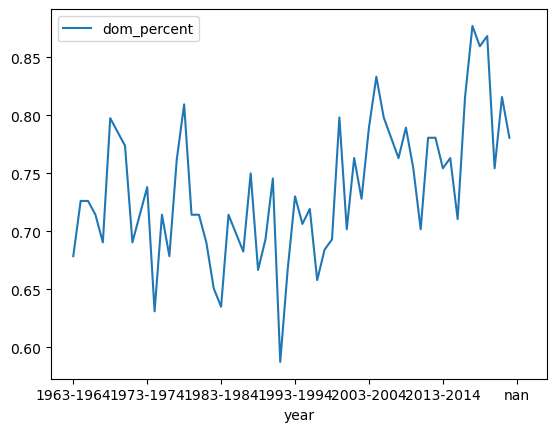

In [16]:
prem_table.plot(x = 'year', y = 'dom_percent') # testing mathplotlib
plt.show()

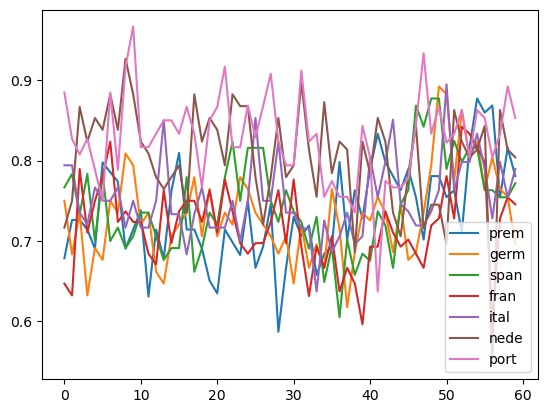

         year      prem      germ      span      fran      ital      nede  \
25  1988-1989  0.666667  0.735294  0.815789  0.697368  0.852941  0.779412   

        port  
25  0.828947  
                                        teams_ordered             champion  \
25  ['OlympiqueMarseille', 'ParisSaint-Germain', '...  Olympique Marseille   

    champ_points  champ_margin       year  num_teams  dom_percent  \
25          53.0           2.0  1988-1989       20.0     0.697368   

   back_to_back topFive_threepeat topThree_threepeat  
25          0.0               1.0                0.0  


In [17]:
prem_domlist = prem_table['dom_percent'][0:60] # getting all the dom_percent data from all leagues, as well as the year
germ_domlist = germ_table['dom_percent'][0:60]
span_domlist = span_table['dom_percent'][0:60]
fran_domlist = fran_table['dom_percent'][0:60]
ital_domlist = ital_table['dom_percent'][0:60]
nede_domlist = nede_table['dom_percent'][0:60]
port_domlist = port_table['dom_percent'][0:60]
year_list = prem_table['year'][0:60]

# putting all the above info into a dictionary to make a dataframe
dom_dict = {'year':year_list, 'prem':prem_domlist, 'germ':germ_domlist, 'span':span_domlist, 'fran':fran_domlist, 'ital':ital_domlist, 'nede':nede_domlist, 'port':port_domlist}

dom_df = pd.DataFrame(dom_dict)

#plotting the data
dom_df.plot()

plt.show()

#highlighting weird segments of the data to check if there was an issue with the webscraping- fixed
print(dom_df.iloc[[25]])
print(fran_table.iloc[[25]])

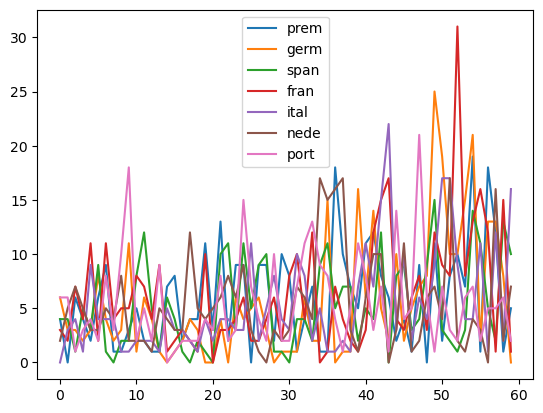

In [18]:
prem_champlist = prem_table['champ_margin'][0:60] # doing the exact same thing as above but with the champ_margin data
germ_champlist = germ_table['champ_margin'][0:60]
span_champlist = span_table['champ_margin'][0:60]
nede_champlist = nede_table['champ_margin'][0:60]
ital_champlist = ital_table['champ_margin'][0:60]
fran_champlist = fran_table['champ_margin'][0:60]
port_champlist = port_table['champ_margin'][0:60]


champM_dict = {'year':year_list, 'prem':prem_champlist, 'germ':germ_champlist, 'span':span_champlist, 'fran':fran_champlist, 'ital':ital_champlist, 'nede':nede_champlist, 'port':port_champlist}

champM_df = pd.DataFrame(champM_dict)

champM_df.plot()

plt.show()

In [29]:
def wowza(league, name): # function to print individual league grpahs
    fig, axs = plt.subplots(figsize=(12, 4))        # Create an empty Matplotlib Figure and Axes
    dom_df[league].plot(color = name) #.area(ax=axs)                   # Use pandas to put the area plot on the prepared Figure/Axes, using dataframe made above for the combined graph
    axs.set_ylabel("Domination %")          # assigning axis titles
    axs.set_xlabel('Year') 
    fig.savefig(f"{league}_dompercent_graph.png")  # saving graphs as png
    plt.show()

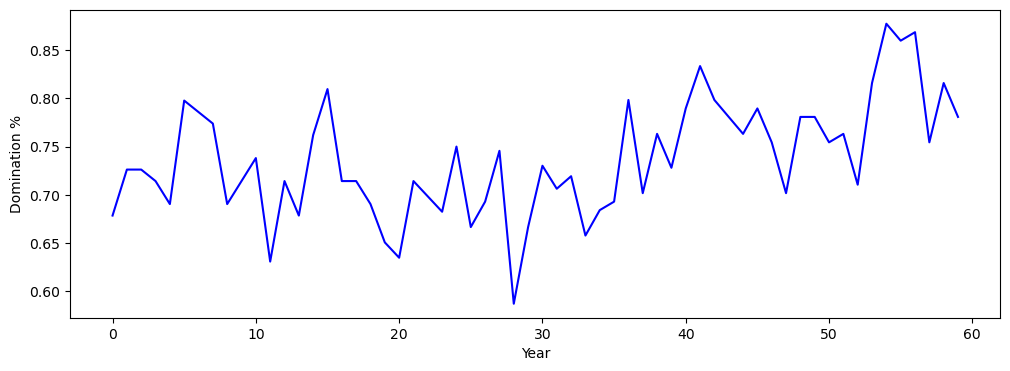

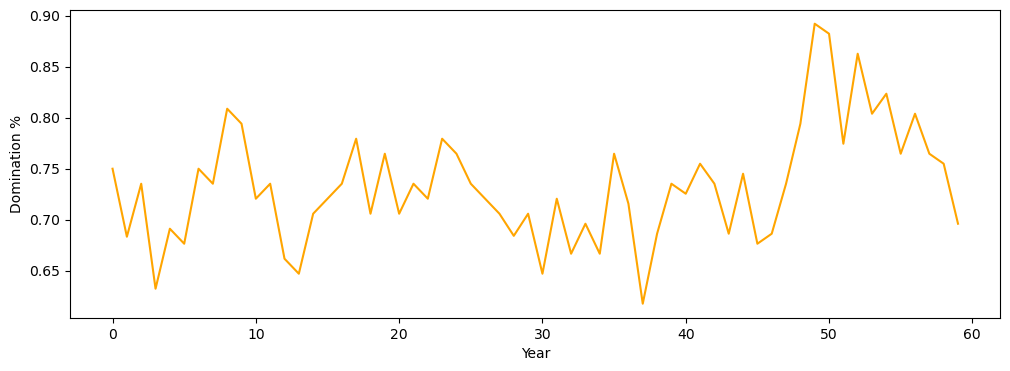

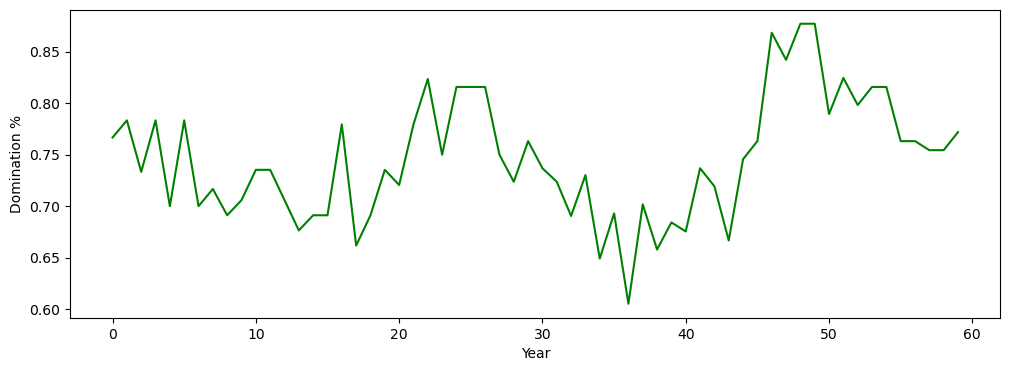

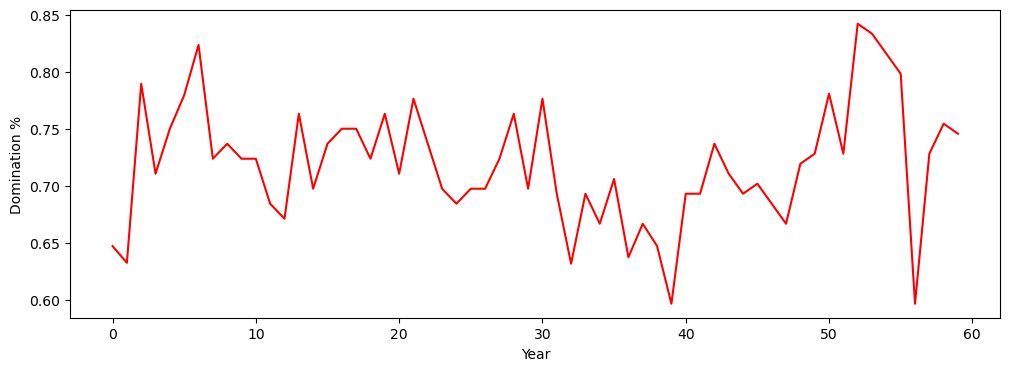

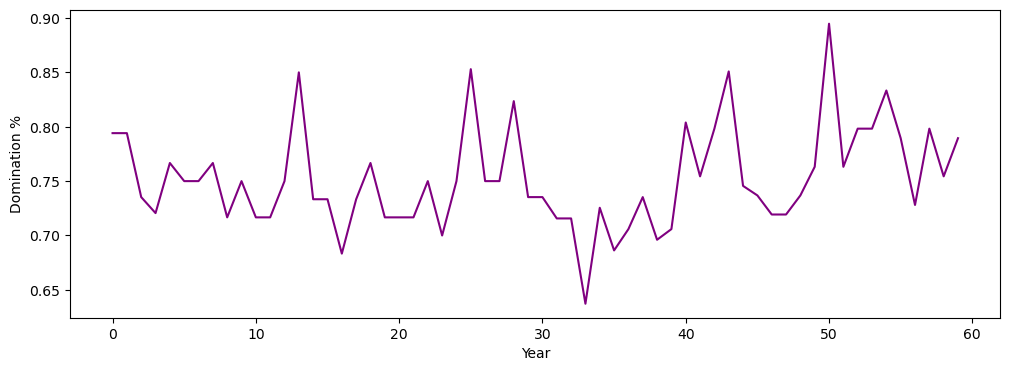

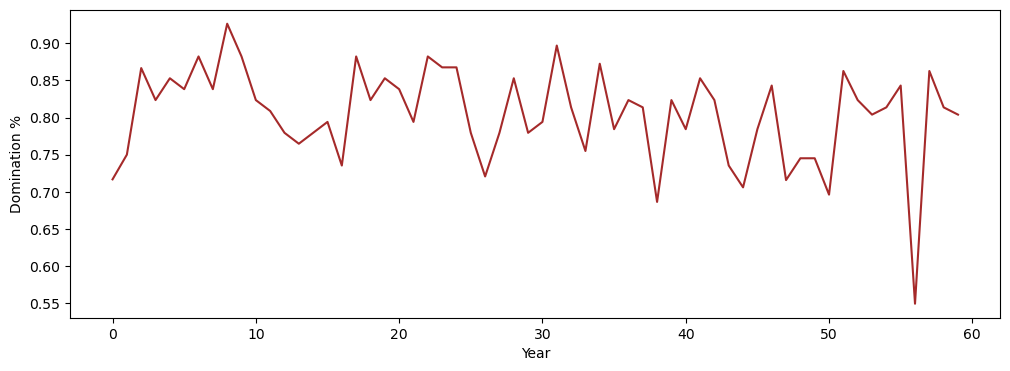

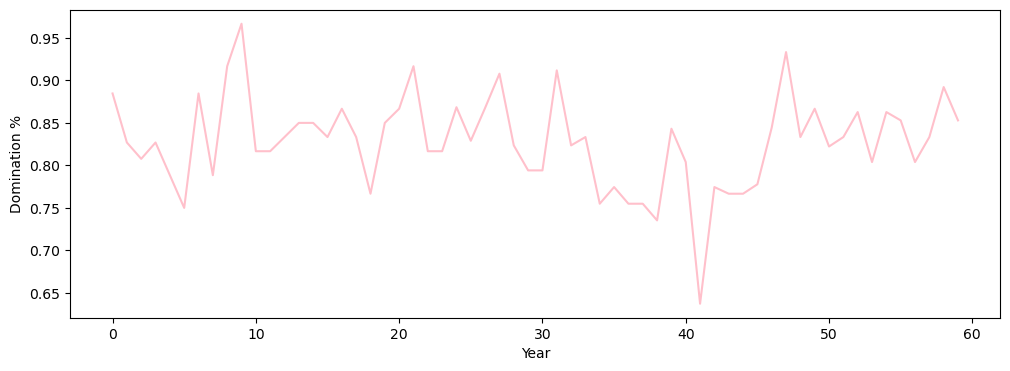

In [30]:
league = ['prem', 'germ', 'span', 'fran', 'ital', 'nede', 'port'] # internal name for all leagues, kept consistent
color = ['b','orange', 'green', 'red', 'purple', 'brown', 'pink'] # colors matching combined graph, because why not
for ii in range(7): # iterating through the list
    wowza(league[ii], color[ii])